### Data Exploratory Analysis to find out percentage of loan taken out of total income###

In [1448]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [1449]:
loan_data=pd.read_csv("C:/Users/Aqsa Baig/Desktop/loan_data.csv")

In [1450]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [1451]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [1452]:
print(loan_data['Self_Employed'].value_counts()['No'])

325


In [1453]:
print(loan_data['Self_Employed'].value_counts()['Yes'])

35


In [1454]:
loan_data['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [1455]:
loan_data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [1456]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [1457]:
loan_data["Gender"].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

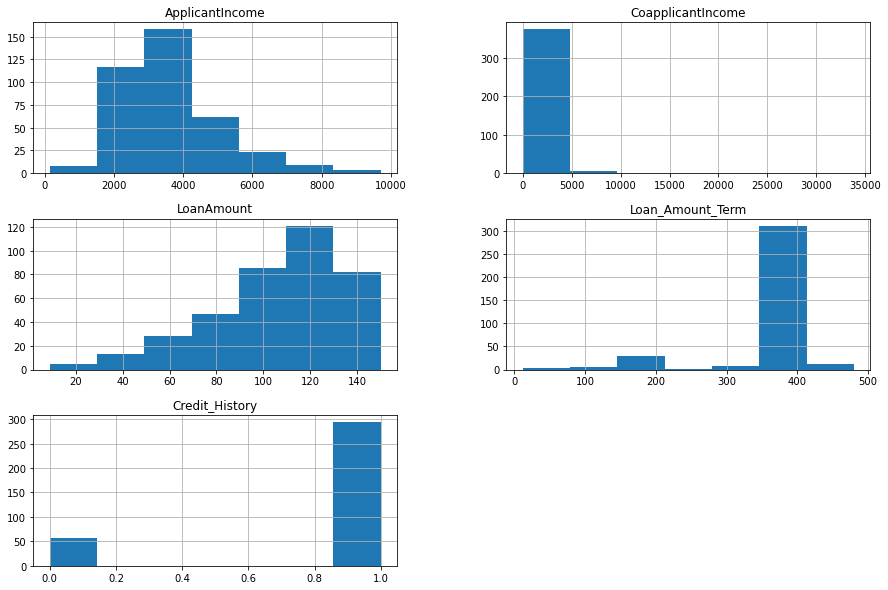

In [1458]:
loan_data.hist(bins=7, figsize=(15,10))
plt.show()

In [1459]:
corr_matrix = loan_data.corr()

In [1460]:
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


In [1461]:
print(loan_data.isnull().sum())     #find out null values#

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [1462]:
loan_data.dropna(inplace=True)   #Dropping null values#

The dataframe has 13 columns.
 out of them , There are 13 columns that have missing values.


,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0


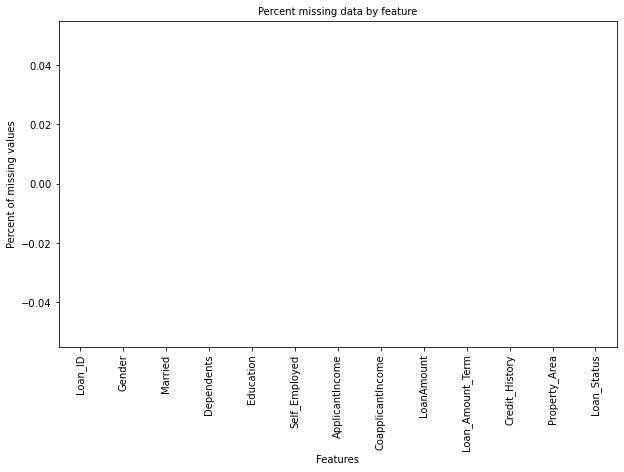

In [1463]:
total = loan_data.isnull().sum().sort_values(ascending=False)
percent = (loan_data.isnull().sum()*100/loan_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)
 # Print some summary information
print ("The dataframe has " + str(loan_data.shape[1]) + " columns.\n"      
     " out of them , There are " + str(missing_data.shape[0]) +
              " columns that have missing values.")
        
missing_data.head() 

In [1464]:
print(loan_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [1465]:
loan_data['Total_Loan'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
print (loan_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

In [1466]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Loan
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0


In [1467]:
loan_data.drop(["ApplicantIncome", "CoapplicantIncome"], axis = 1, inplace=True)

In [1468]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Loan
0,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
4,LP001013,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,Y,3849.0


In [1469]:
loan_data.drop(["Loan_Amount_Term", "Loan_ID"], axis = 1, inplace=True)

In [1470]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Loan
0,Male,Yes,1,Graduate,No,128.0,1.0,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,Y,4941.0
3,Male,No,0,Graduate,No,141.0,1.0,Urban,Y,6000.0
4,Male,Yes,0,Not Graduate,No,95.0,1.0,Urban,Y,3849.0


In [1471]:
# Assuming df is your DataFrame and you want to rename the 'old_column_name' to 'new_column_name'
loan_data.rename(columns={'Total_Loan': 'Total_Income'}, inplace=True)

In [1472]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,Yes,1,Graduate,No,128.0,1.0,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,Y,4941.0
3,Male,No,0,Graduate,No,141.0,1.0,Urban,Y,6000.0
4,Male,Yes,0,Not Graduate,No,95.0,1.0,Urban,Y,3849.0


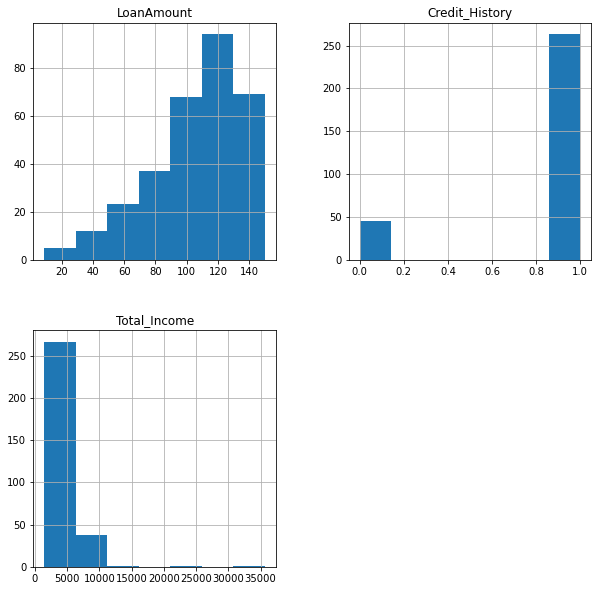

In [1473]:
loan_data.hist(bins=7, figsize=(10,10))
plt.show()

In [1474]:
loan_data['Loan_Status'].value_counts()

Y    219
N     89
Name: Loan_Status, dtype: int64

<AxesSubplot:>

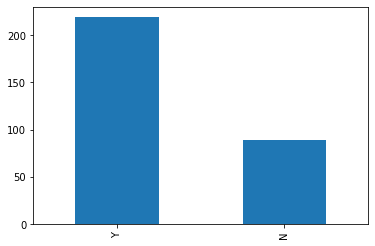

In [1475]:
loan_data['Loan_Status'].value_counts().plot(kind='bar')

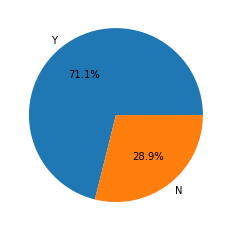

In [1476]:
temp = loan_data['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

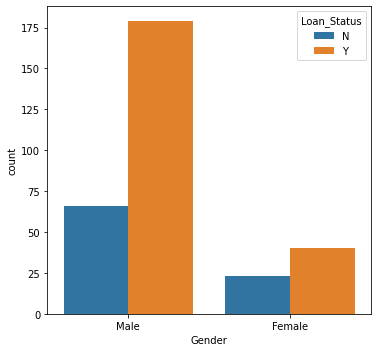

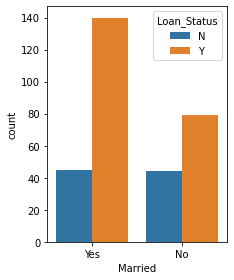

In [1477]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=loan_data, x=col, hue='Loan_Status')
    plt.tight_layout()
    plt.show()


In [1478]:
loan_data.groupby('Gender').mean()['LoanAmount']

Gender
Female     98.428571
Male      106.216327
Name: LoanAmount, dtype: float64

In [1479]:
loan_data.groupby('Self_Employed').mean()['LoanAmount']

Self_Employed
No     104.503571
Yes    105.821429
Name: LoanAmount, dtype: float64

In [1480]:
loan_data.groupby('Married').mean()['LoanAmount']

Married
No      98.235772
Yes    108.870270
Name: LoanAmount, dtype: float64

In [1481]:
loan_data.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female     93.130435
         Male      101.285714
Yes      Female    112.764706
         Male      108.476190
Name: LoanAmount, dtype: float64

In [1482]:
total_income_sum = loan_data['Total_Income'].sum()

In [1483]:
print(total_income_sum)

1502288.91998864


In [1484]:
total_loan_amount_sum = loan_data['LoanAmount'].sum()
print(total_loan_amount_sum)

32224.0


<AxesSubplot:>

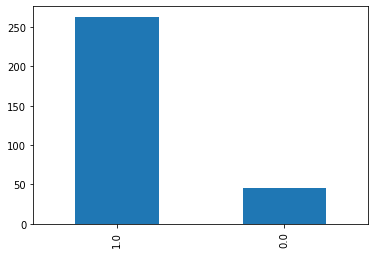

In [1485]:
# Display bar chart on credit History#
loan_data['Credit_History'].value_counts().plot(kind='bar')

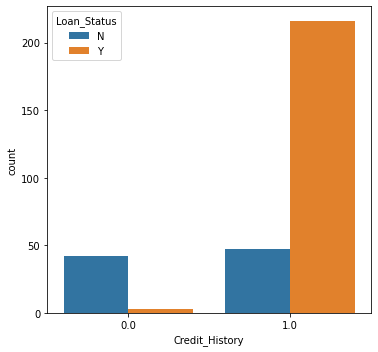

In [1486]:
# display loan status on credit history#
plt.subplots(figsize=(10, 5))
for i, col in enumerate(['Credit_History']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=loan_data, x=col, hue='Loan_Status')
    plt.tight_layout()
    plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


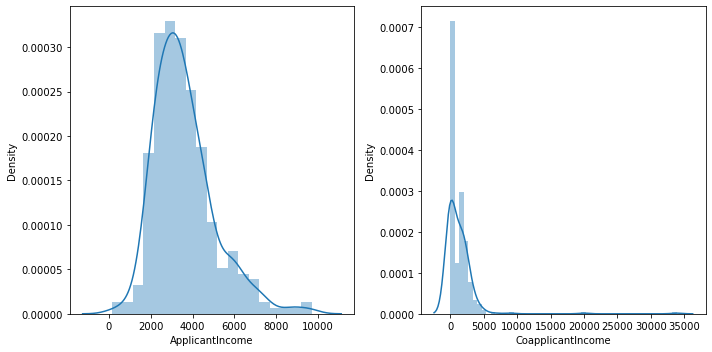

In [1487]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome']):
	plt.subplot(1, 2, i+1)
	sb.distplot(df[col])
plt.tight_layout()
plt.show()


In [1488]:
percentage = (total_loan_amount_sum / total_income_sum) * 100

In [1489]:
print(percentage)

2.1449935209695665


<AxesSubplot:>

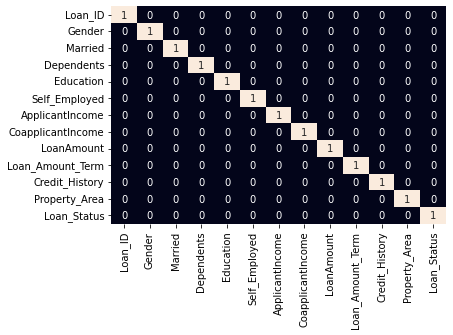

In [1490]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(loan_data):
    for col in loan_data.columns:  # Change 'data' to 'loan_data'
        if loan_data[col].dtype == 'object':
            le = LabelEncoder()
            loan_data[col] = le.fit_transform(loan_data[col])
    return loan_data

# Applying function to the whole DataFrame
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)


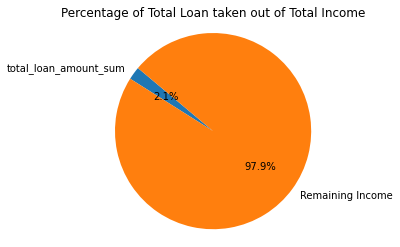

In [1491]:
# Assuming percentage is the calculated percentage
labels = ['total_loan_amount_sum', 'Remaining Income']
sizes = [percentage, 100 - percentage]  # 100% - percentage to represent remaining income

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Total Loan taken out of Total Income')

plt.show()
